**Prophet & Neural Prophet**

**Import Library**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from neuralprophet import NeuralProphet, set_log_level


**Load the Data**

In [ ]:
filename = 'data.csv'
df = pd.read_csv(filename, sep= ';')
df.drop(['PRODUCT_CATEGORY','TRANSACTIONS','STORE_CODE'], axis=1, inplace=True)
# df['DATE'] =  pd.to_datetime(df['DATE'])
df

,DATE,QTY
0,18/05/16,5
1,20/05/16,4
2,21/05/16,13
3,24/05/16,3
4,25/05/16,1
...,...,...
28146,13/06/19,3
28147,14/06/19,5
28148,15/06/19,2
28149,16/06/19,1


**Data Preprocessing**

In [ ]:
filename = 'data.csv'
df = pd.read_csv(filename, sep= ';')
df.drop(['PRODUCT_CATEGORY','TRANSACTIONS','STORE_CODE'], axis=1, inplace=True)
df['DATE'] =  pd.to_datetime(df['DATE'])
start_date = '2016-05-18'
end_date = '2019-06-18'
df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

df['QTY'] = abs(df['QTY'])
# df = df.set_index('DATE')
# df = df.sort_values(by='DATE')
df = df.groupby('DATE', as_index=False).sum()
df

,DATE,QTY
0,2016-05-18,114
1,2016-05-19,96
2,2016-05-20,146
3,2016-05-21,211
4,2016-05-22,42
...,...,...
1039,2019-06-14,207
1040,2019-06-15,263
1041,2019-06-16,75
1042,2019-06-17,203


In [ ]:
df = df.rename(columns={'DATE': 'ds', 'QTY': 'y'})
df = df.groupby('ds', as_index=False).sum()
df

,ds,y
0,2016-05-18,114
1,2016-05-19,96
2,2016-05-20,146
3,2016-05-21,211
4,2016-05-22,42
...,...,...
1039,2019-06-14,207
1040,2019-06-15,263
1041,2019-06-16,75
1042,2019-06-17,203


**Detecting Outliers**

In [ ]:
# from scipy.stats import zscore
# z_scores = zscore(df['y'])
# outliers = (z_scores > 2) | (z_scores < -2)
# outlier_indices = df.index[outliers]

# print("Detected outliers:", outlier_indices)
# total_outliers = len(outlier_indices)
# print("Total number of outliers:", total_outliers)


In [ ]:
# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['y'], label='Original Data', marker='o')
# plt.scatter(outlier_indices, df.loc[outlier_indices, 'y'], c='red', label='Outliers', marker='x', s=100)
# plt.xlabel('Index')
# plt.ylabel('y')
# plt.title('Outlier Detection using Z-Score')
# plt.legend()
# plt.show()


In [ ]:
# Remove outliers from the DataFrame
# df = df.drop(outlier_indices)
# df

**Splitting the Data**

In [ ]:
split_index = int(len(df) * 0.8)
df_train = df.iloc[:split_index]
df_val = df.iloc[split_index:]

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1044
Train dataset size: 835
Validation dataset size: 209


**Prophet**

In [ ]:
p = Prophet()
p.fit(df_train)
future_prophet = p.make_future_dataframe(periods=365)
forecast_prophet = p.predict(future_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.2809
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1287.19   8.61666e-05       78.5618      0.8358      0.8358      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1287.38    0.00113701       110.153   1.153e-05       0.001      276  LS failed, Hessian reset 
     199       1287.46   2.88939e-05       71.2635      0.6063      0.6063      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       1287.46   2.50213e-08       81.9282      0.1543      0.4413      341   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Figure(720x432)


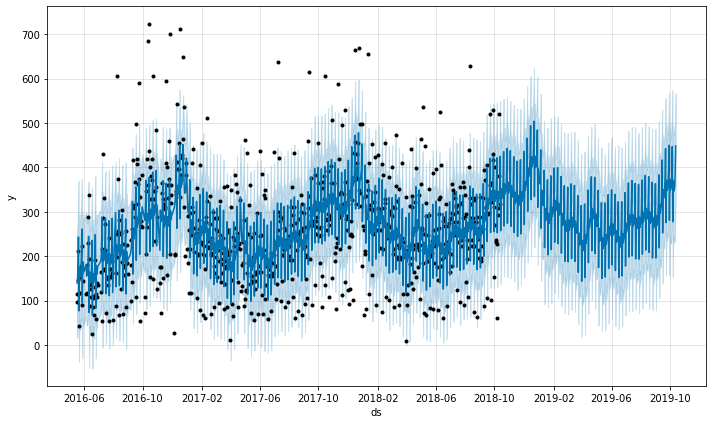

In [ ]:
plot1 = p.plot(forecast_prophet)
print(plot1)

Figure(648x648)


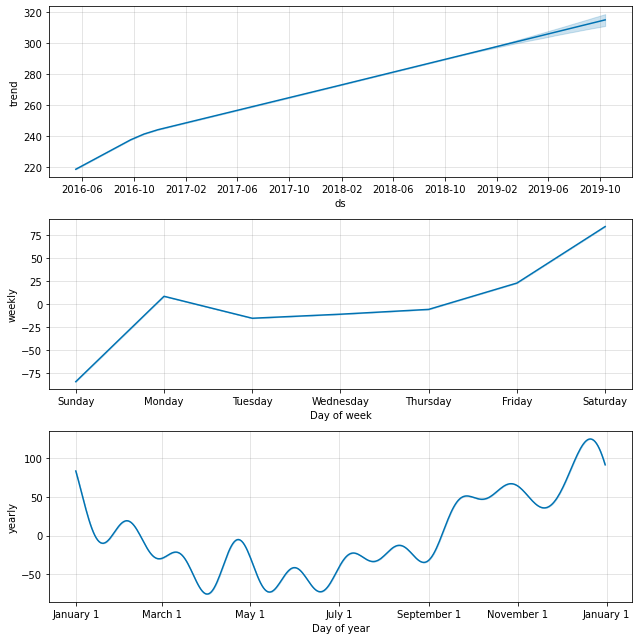

In [ ]:
plot2 = p.plot_components(forecast_prophet)
print(plot2)

**Chnage points**

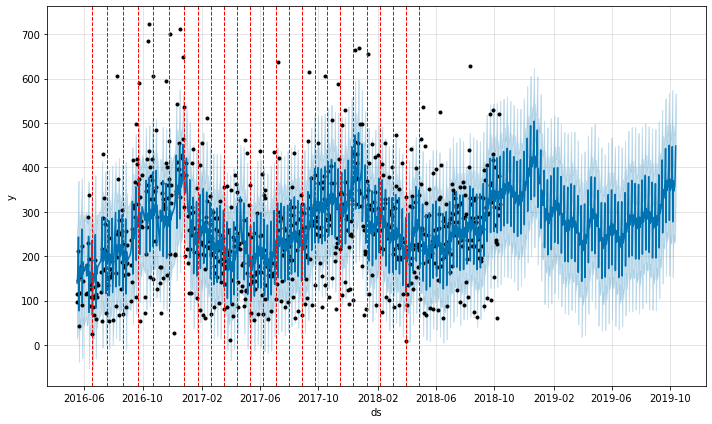

In [ ]:
fig = p.plot(forecast_prophet)
for cp in p.changepoints:
    plt.axvline(cp, c='red', ls='--', lw=1)

In [ ]:
df_cv = cross_validation(
    p, initial='500 days', horizon ='365 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]
df_cv

INFO:prophet:Making 1 forecasts with cutoffs between 2017-10-12 00:00:00 and 2017-10-12 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

Initial log joint probability = -9.99298
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       734.757   0.000457612       54.7408   7.704e-06       0.001      143  LS failed, Hessian reset 
      99       734.788   6.76063e-05       68.9621      0.8318      0.8318      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       734.794    2.5427e-06       65.9389   6.636e-08       0.001      231  LS failed, Hessian reset 
     148       734.795   3.08168e-08       49.5803      0.7039      0.7039      270   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-10-13,363.797106,255.188134,483.326022,381,2017-10-12
1,2017-10-14,423.448463,298.475789,548.807210,605,2017-10-12
2,2017-10-15,273.078079,162.198142,388.934257,134,2017-10-12
3,2017-10-16,371.873923,248.892765,500.214211,316,2017-10-12
4,2017-10-17,335.605614,221.747338,462.348467,284,2017-10-12
...,...,...,...,...,...,...
356,2018-10-08,359.011003,243.212175,482.314948,292,2017-10-12
357,2018-10-09,321.980062,202.497559,431.564580,308,2017-10-12
358,2018-10-10,341.823216,224.820699,471.147204,380,2017-10-12
359,2018-10-11,332.707946,212.629102,447.346403,520,2017-10-12


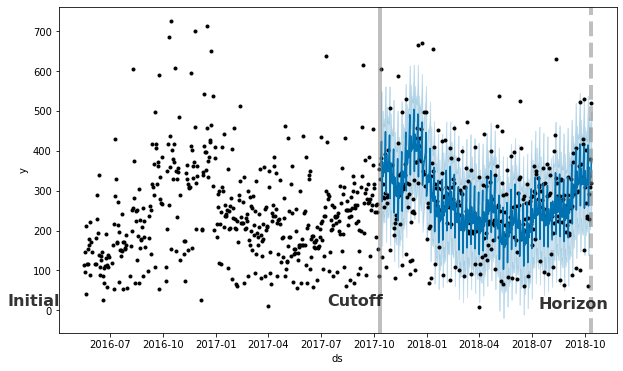

In [ ]:
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(p.history['ds'].values, p.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2016-01-06'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2017-07-13'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2018-07-13'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);

In [ ]:
df_train

,ds,y
0,2016-05-18,114
1,2016-05-19,96
2,2016-05-20,146
3,2016-05-21,211
4,2016-05-22,42
...,...,...
830,2018-10-08,292
831,2018-10-09,308
832,2018-10-10,380
833,2018-10-11,520


**Neural Prophet**

In [ ]:
n = NeuralProphet()
n.fit(df_train)
future_neural = n.make_future_dataframe(df_train, periods=365)
forecast_neural = n.predict(future_neural)
# metrics = n.fit(df_train, freq='M', validation_df=df_val, plot_live_loss=True)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.084% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.084% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
INFO - (NP.co

Finding best initial lr:   0%|          | 0/224 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.084% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.084% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 53it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast_neural

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2018-10-13,None,413.594788,253.205704,75.779427,84.609650
1,2018-10-14,None,241.894669,252.961929,75.113815,-86.181053
2,2018-10-15,None,334.632324,252.718155,74.246132,7.668019
3,2018-10-16,None,312.591125,252.474411,73.184059,-13.067344
4,2018-10-17,None,311.355835,252.230606,71.936882,-12.811669
...,...,...,...,...,...,...
360,2019-10-08,None,228.171555,165.446976,75.791931,-13.067344
361,2019-10-09,None,228.637894,165.203201,76.246376,-12.811669
362,2019-10-10,None,239.540863,164.959427,76.486076,-1.904625
363,2019-10-11,None,262.912567,164.715637,76.509888,21.687019


In [ ]:
forecast_neural_with_actual = forecast_neural[['ds', 'yhat1']].copy()
forecast_neural_with_actual['y'] = df_train['y']
forecast_neural['y'] = forecast_neural_with_actual['y'].values

In [ ]:
n.plot(forecast_neural)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'b1cee4fa-39be-4430-8143-da30c324c67b',
              'x': array([datetime.datetime(2018, 10, 13, 0, 0),
                          datetime.datetime(2018, 10, 14, 0, 0),
                          datetime.datetime(2018, 10, 15, 0, 0), ...,
                          datetime.datetime(2019, 10, 10, 0, 0),
                          datetime.datetime(2019, 10, 11, 0, 0),
                          datetime.datetime(2019, 10, 12, 0, 0)], dtype=object),
              'y': array([413.5947876 , 241.89466858, 334.63232422, ..., 239.54086304,
                          262.91256714, 325.39981079])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
          

In [ ]:
n.plot_components(forecast_neural)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '56d4efb4-15cf-462f-8550-edcca54216c8',
              'x': array([datetime.datetime(2018, 10, 13, 0, 0),
                          datetime.datetime(2018, 10, 14, 0, 0),
                          datetime.datetime(2018, 10, 15, 0, 0), ...,
                          datetime.datetime(2019, 10, 10, 0, 0),
                          datetime.datetime(2019, 10, 11, 0, 0),
                          datetime.datetime(2019, 10, 12, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([253.20570374, 252.96192932, 252.71815491, ..., 164.95942688,
                          164.71563721, 164.47186279]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly s

In [ ]:
n.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'cdc87a72-1e68-4ac0-964f-cebf1f1e05f0',
              'x': array([datetime.datetime(2016, 5, 18, 0, 0),
                          datetime.datetime(2016, 5, 19, 0, 0),
                          datetime.datetime(2016, 5, 20, 0, 0), ...,
                          datetime.datetime(2018, 10, 10, 0, 0),
                          datetime.datetime(2018, 10, 11, 0, 0),
                          datetime.datetime(2018, 10, 12, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([177.68778937, 177.79668726, 177.90558515, ..., 253.93703957,
                          253.6932653 , 253.44949104]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
        

In [ ]:
df_val['forecast_prophet'] = forecast_prophet['yhat'][:len(df_val)].values
df_val['forecast_neural'] = forecast_neural['yhat1'][:len(df_val)].values

**Comparing the results**

In [ ]:
def my_rmse(x, y):
    return np.round(np.sqrt(np.sqrt(mean_squared_error(x, y))))
def my_mse(x, y):
    return np.round(np.sqrt(mean_squared_error(x, y)))
def my_mae(x, y):
    return np.round(np.sqrt(mean_absolute_error(x, y)))
def my_r2_score(x, y):
    return r2_score(x, y)
df_val.dropna(inplace=True)

err1_rmse = my_rmse(df_val['y'], df_val['forecast_prophet'])
err1_mse = my_mse(df_val['y'], df_val['forecast_prophet'])
err1_mae = my_mae(df_val['y'], df_val['forecast_prophet'])
err1_r2 = my_r2_score(df_val['y'], df_val['forecast_prophet'])

err2_rmse = my_rmse(df_val['y'], df_val['forecast_neural'])
err2_mse = my_mse(df_val['y'], df_val['forecast_neural'])
err2_mae = my_mae(df_val['y'], df_val['forecast_neural'])
err2_r2 = my_r2_score(df_val['y'], df_val['forecast_neural'])

print('Prophet Forecasts:')
print(f'RMSE: {err1_rmse:.4f}')
print(f'MSE: {err1_mse:.4f}')
print(f'MAE: {err1_mae:.4f}')
print(f'R2 Score: {err1_r2:.4f}')
print('\n')
print('NeuralProphet Forecasts:')
print(f'RMSE: {err2_rmse:.4f}')
print(f'MSE: {err2_mse:.4f}')
print(f'MAE: {err2_mae:.4f}')
print(f'R2 Score: {err2_r2:.4f}')

Prophet Forecasts:
RMSE: 12.0000
MSE: 151.0000
MAE: 11.0000
R2 Score: -1.0370


NeuralProphet Forecasts:
RMSE: 10.0000
MSE: 103.0000
MAE: 9.0000
R2 Score: 0.0492
